### `Power Transformer`

- Here we will see two type of transformations *`Box Cox Transform`* and *`Yeo-Johnson Transform`*
- When the  distribution is not *`normal`* and we are using an algorithm which works better on normally distributed data like *`Linear Regression`*, *`Logistic Regression`*, *`KNN`*, then we need to use this *`Power Transformer`*.

#### *`Box Cox Transform`*

- Using this transformer we can transform any distribution to a *`normal`* distribution.
- This is the *`General Transformer`*. The *`Log Normal Transformer`* and *`Square Root Transformer`* are modified versions of this Transformer.
- Here we try to find out what should be the optimal value as power of `x` to make the distribution as *`normal distribution`*, where `x` is the data point in the distribution.
- The range of *`Box Cox Transform`* is *`-5`* to *`5`*.
- The *`Box Cox Transform`* is only applicable to numbers where the *`number > 0`* and it should not be *`number <= 0`*.

#### *`Yeo-Johnson Transform`*

- This transformation solves the restrictions associated with the *`Box Cox Transform`* i.e. The *`Yeo-Johnson Transform`* is applicable to numbers even when *`number <= 0`*. 
- So we can transform *`negative`* values with it.
- It is a variation of the *`Box Cox Transform`*.

In [28]:
# importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# to plot the QQ plot
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# we use PowerTransformer to apply the transformations
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [29]:
# importing the dataset

df = pd.read_csv('datasets/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Here we will predict the *`Strength`* of the concrete by using *`Linear Regression`* model.**

In [30]:
df.shape

(1030, 9)

In [31]:
# Checking null values

df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [32]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Notes:**

- So there are no null values in the dataset.
- There is no `negative` value in any column but there are *`0`* is as minimum value in columns like *`Blast Furnace Slag`*, *`Fly Ash`* and *`Superplasticizer`*, so we cannot use the *`Box Cox Transform`* on these columns.

### Now doing train test split

In [33]:
# Creating independent and dependent variables

X = df.drop(columns=['Strength'], axis=1)
y = df['Strength']

In [34]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((824, 8), (206, 8))

### Now creating model and predict with the raw data to check accuracy

In [36]:
# Applying Regression model without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [37]:
# Checking accuracy

print(f"The accuracy of the model with non transformed data is: {r2_score(y_test,y_pred)}")

The accuracy of the model with non transformed data is: 0.6275531792314848


In [38]:
# Now checking accuracy with cross validation

lr = LinearRegression()
print("The accuracy of the model after cross validation is: ", 
      np.mean(cross_val_score(lr, X, y, scoring='r2')))

The accuracy of the model after cross validation is:  0.4609940491662864


**Notes:**

- So here we can see the perfomance of the model degraded after cross validate 10 times. So the actual result is not very good.

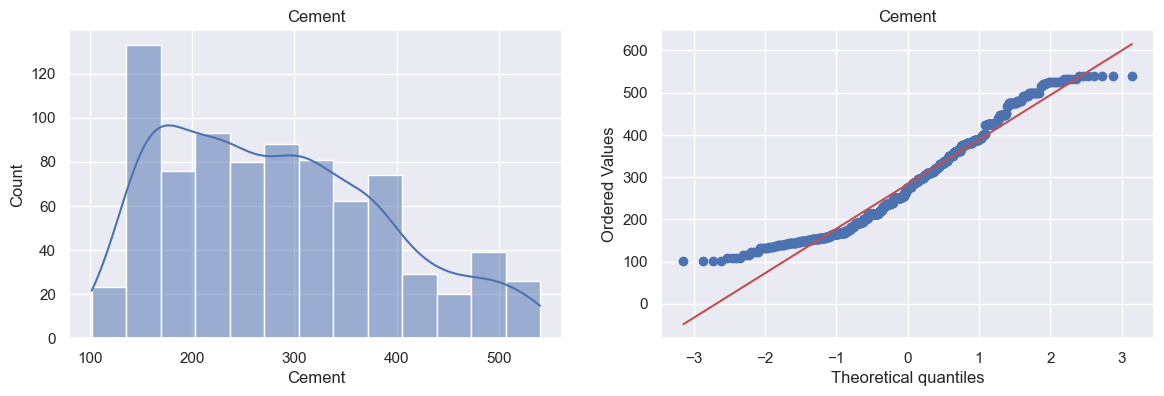

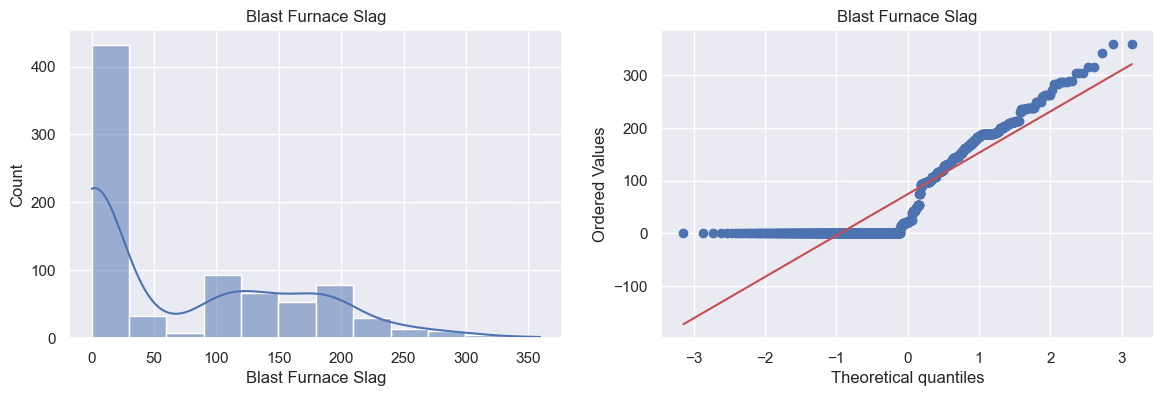

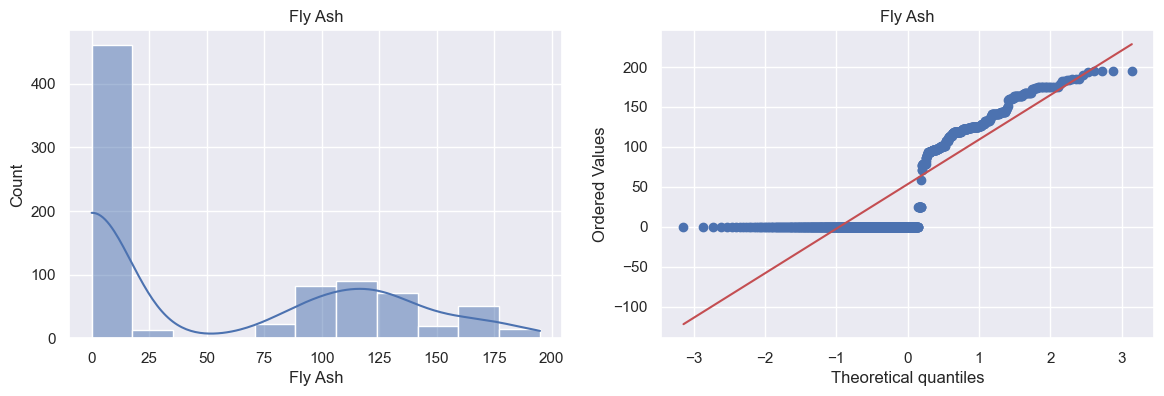

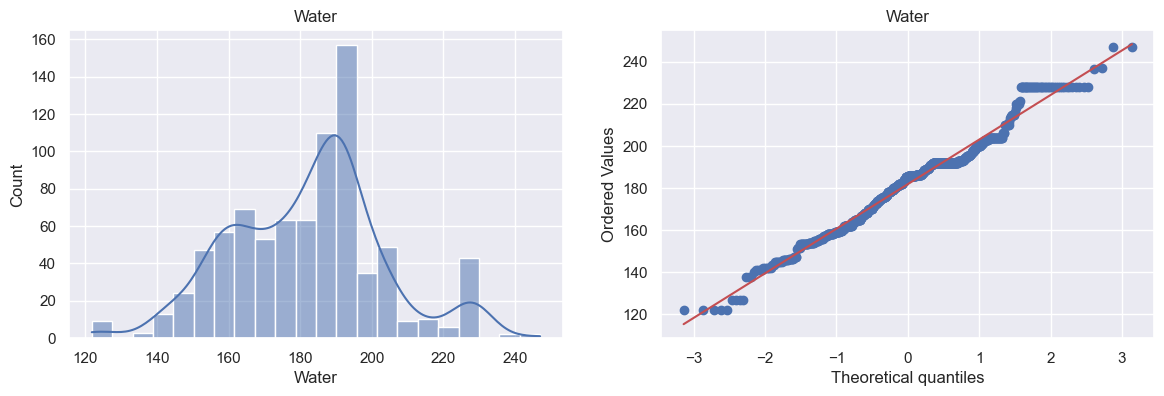

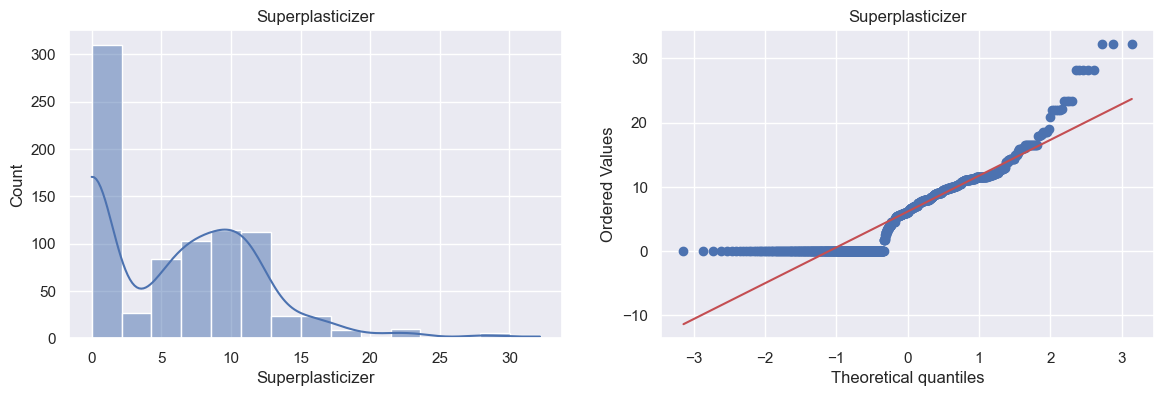

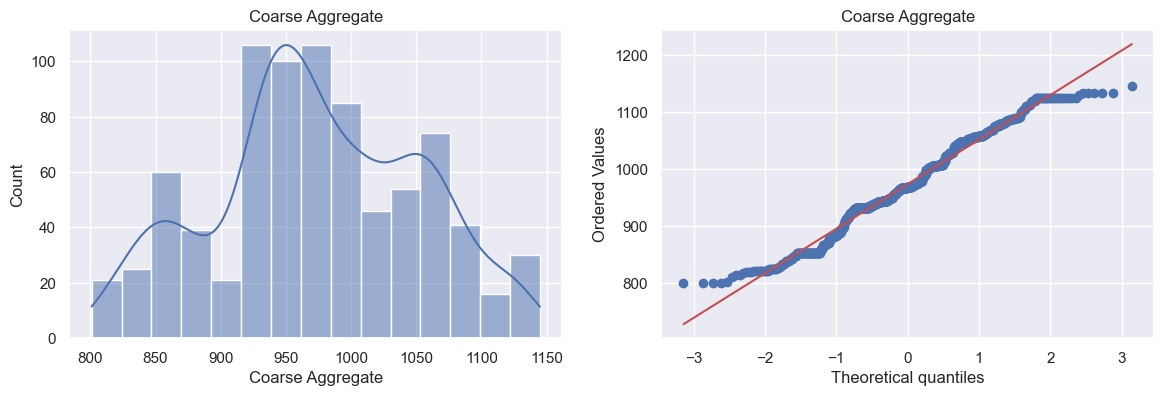

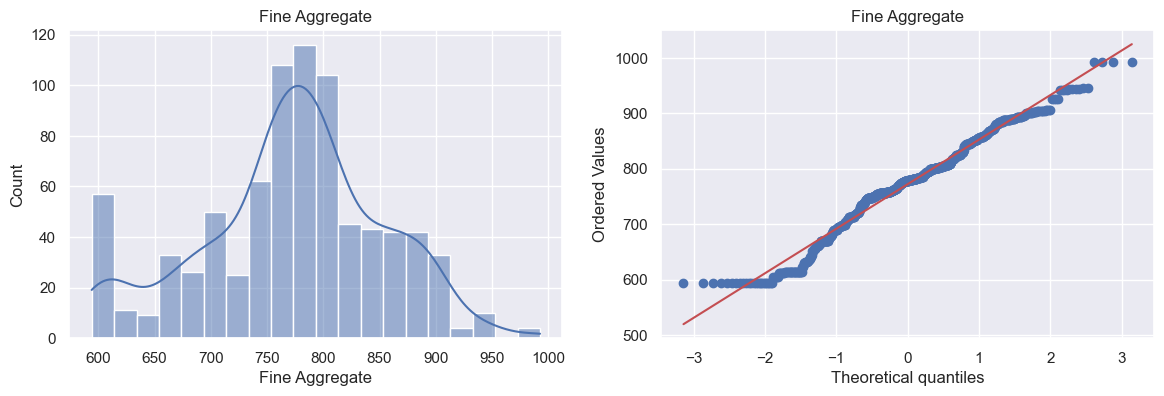

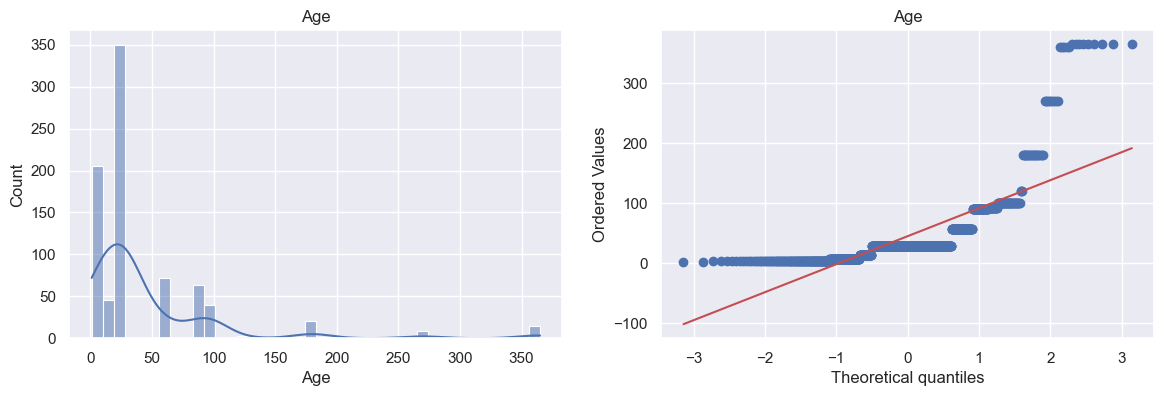

In [39]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

**Notes:**

- So we can see:
    - The *`Coarse Aggregate`* has the best distribution.
    - The *`Cement`*, *`Water`* and *`Fine Aggregate`* is almost *`normal`*.
    - The *`Blast Furnace Slag`* is *`right skewed`*.
    - The *`Fly Ash`* is a *`Bi-model`*.
    - The *`Superplasticizer`* is *`right skewed`* and *`Bi-model`*.
    - The *`Age`* has the worst distribution.

#### Now applying the *`Box Cox Transformation`*

- Here we will calculate one *$\lambda$* value for each input column.
- This *$\lambda$* value is the power that is raised on the column to transform it.

In [40]:
# Here we aplly 'PowerTransformer()' to transform features more normally distributed
# Here we using the 'box-cox' transformation, by default the method is 'Yeo_johnson'
# By default here Standardization tooks place on the data, 
# i.e. internally StandardScaler gets applied.
# Here 'pt.lambdas_' will give all the lambda values for each column

pt = PowerTransformer(method='box-cox')

# Here we are adding small values with X-train 
# and X-test to overcome the 0 values as we are using 'Box-Cox'
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


**Notes:**

- So it means that as the *$\lambda$* of *`Cement`* column is 0.177, so to transform a value of the column say *`540`* we have to apply transformation as *$(540)^{0.177}$*

### Applying linear regression on transformed data

In [41]:
# Creating model and training it and getting prediction

lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred2 = lr.predict(X_test_transformed)

In [42]:
# Checking accuracy

print(f"The accuracy of the model with transformed data is: {r2_score(y_test, y_pred2)}")

The accuracy of the model with transformed data is: 0.8047825006181187


In [43]:
# Again checking accuracy with cross validation

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
print("The accuracy of the model after cross validation is: ",
      np.mean(cross_val_score(lr, X_transformed, y,scoring='r2')))

The accuracy of the model after cross validation is:  0.6658537942219862


**Notes:**

- Now we can see there is a huge increase in accuracy with the transformed data, from *`0.6275`* to *`0.8047`*
- And after Cross validate we get an accuracy value of *`0.6658`* which is yet better than previous model's *`0.4609`*.

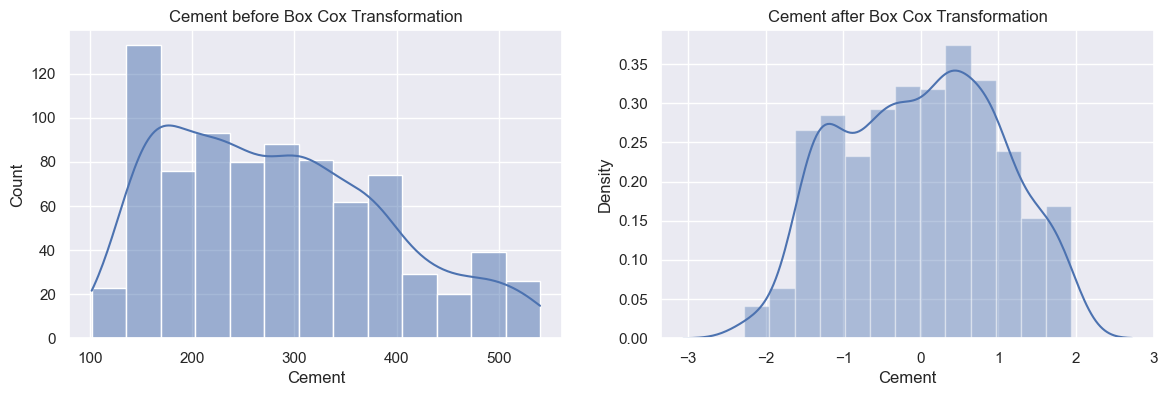

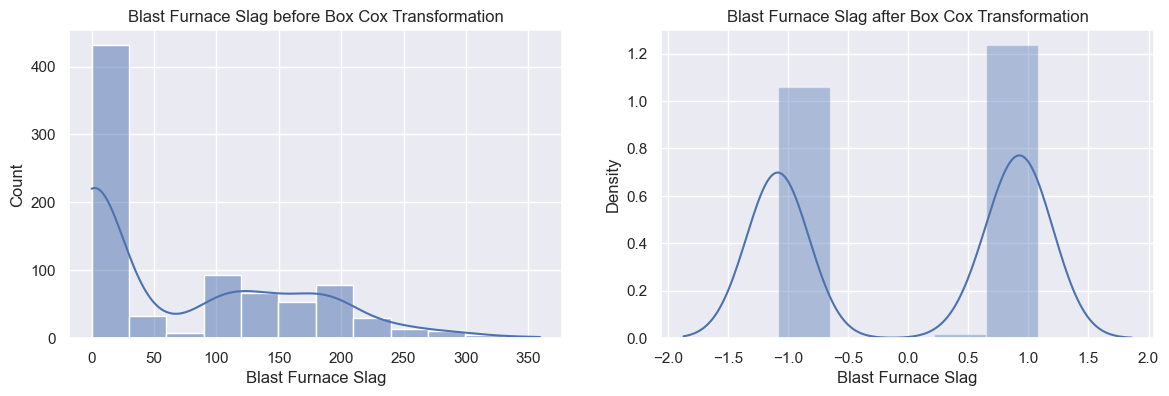

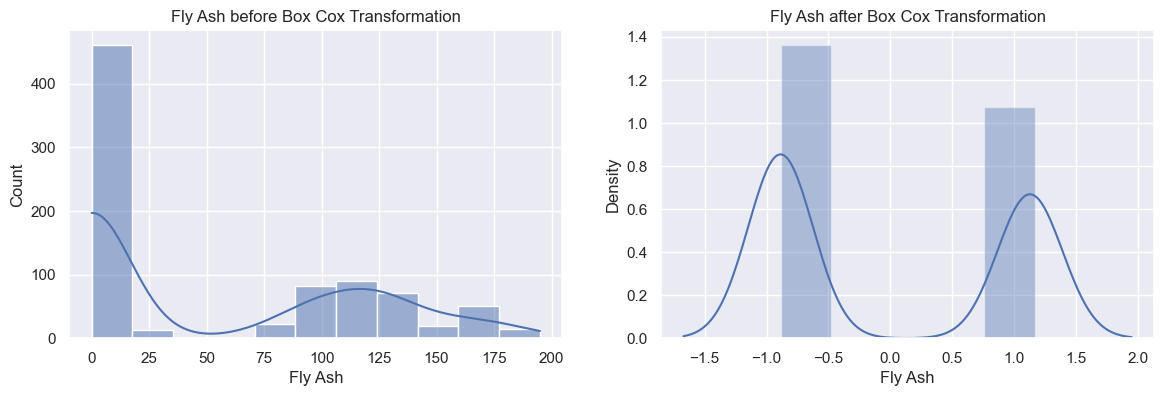

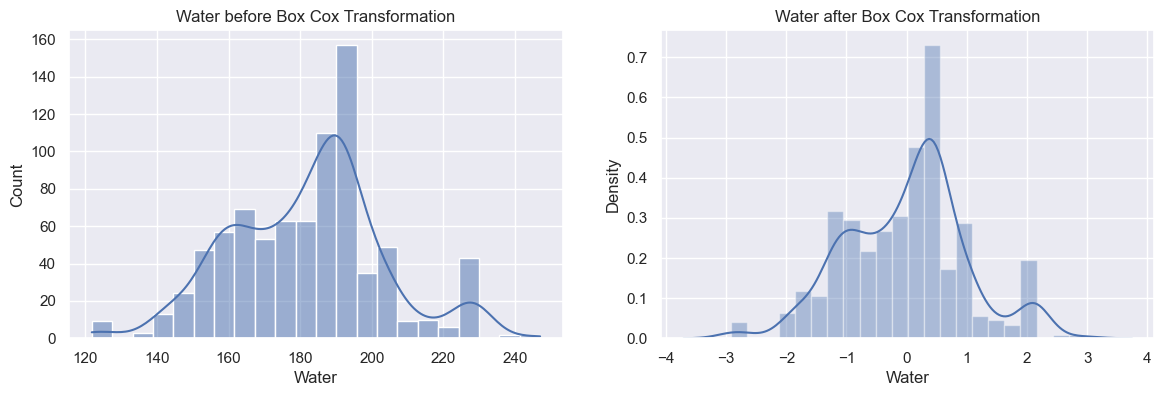

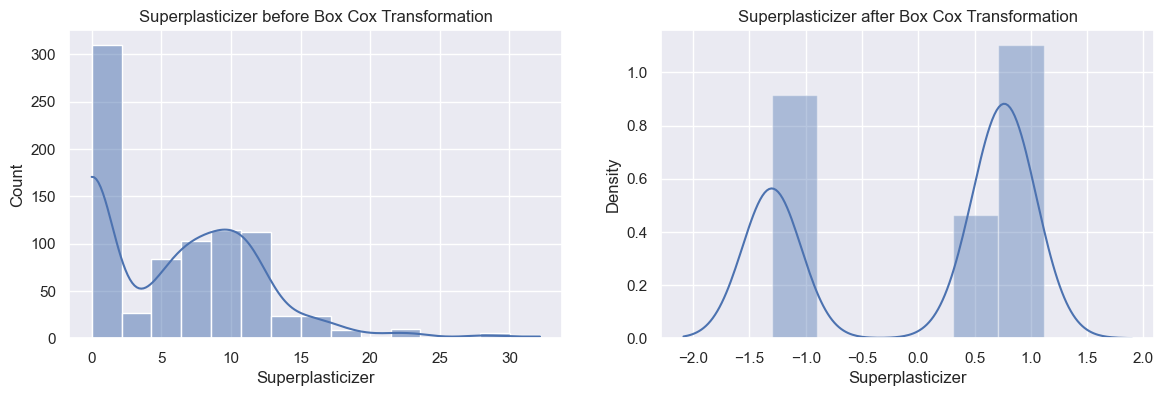

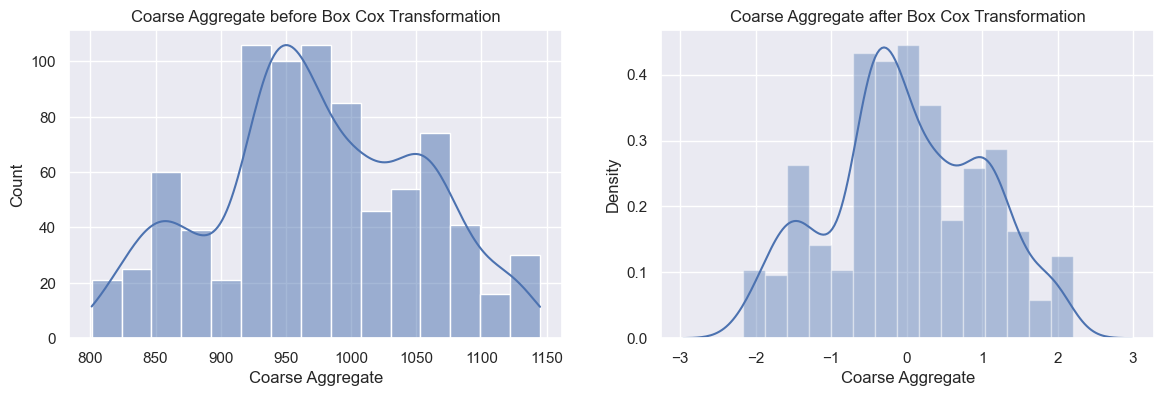

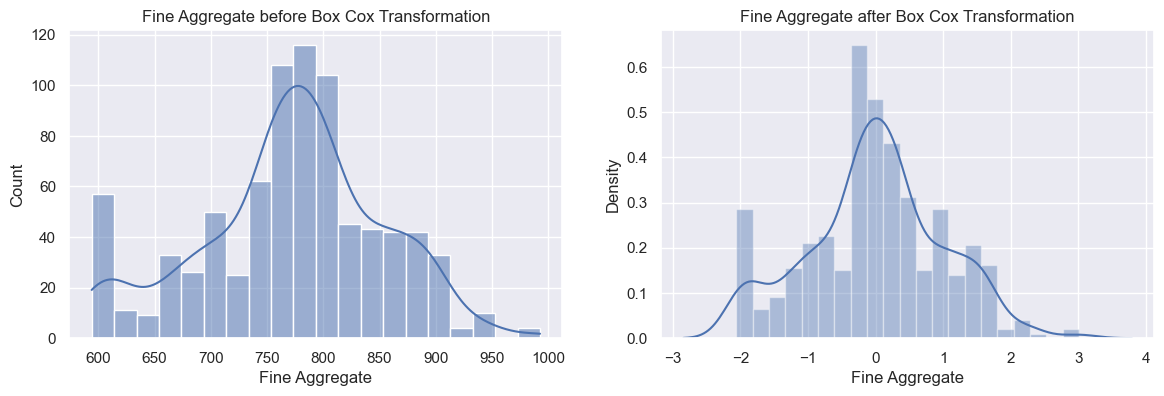

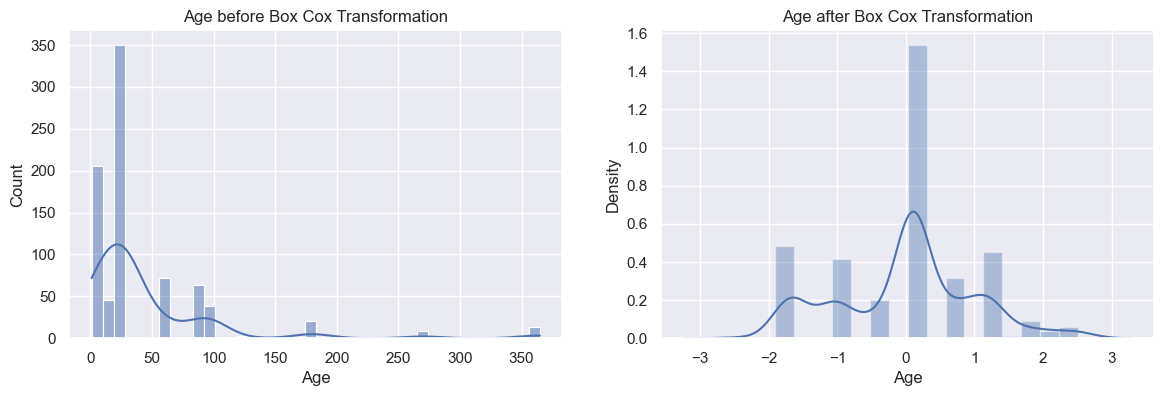

In [44]:
# Comparison of Before and after for Box-Cox Plot

# Here transforming the 'X_train_transformed' as dataframe so we can plot graph
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)


for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(f"{col} before Box Cox Transformation")

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(f"{col} after Box Cox Transformation")

    plt.show()

**Notes:**

- Here we can see the columns with *`right skewed`* and *`Bi-model`* has changed a bit.
- And there is a drastic improvement in the column *`Age`*, here it is almost normally distributed now.

### Now applying *`Yeo-Johnson`*

In [45]:
# By default the method is 'Yeo-Johnson'

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)


pd.DataFrame({'cols':X_train.columns, 'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


### Again applying Linear Regression on this transformed data

In [46]:
# Creating model, training it and get prediction

lr = LinearRegression()

lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)


In [47]:
# Checking accuracy

print(f"The accuracy of the model with transformed data is: {r2_score(y_test, y_pred3)}")

The accuracy of the model with transformed data is: 0.8161906513339304


In [48]:
# Again doing cross validation

pt = PowerTransformer()

# As this is Yeo-Johnson method so we don't need to worry about the 0 value
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
print("The accuracy of the model after cross validation is: ",
      np.mean(cross_val_score(lr, X_transformed2, y,scoring='r2')))

The accuracy of the model after cross validation is:  0.6834625134285748


**Notes:**

- So here we can see the accuracy increased from *`0.6658`* of *`Box Cox Transformation`* to *`0.6834`*.

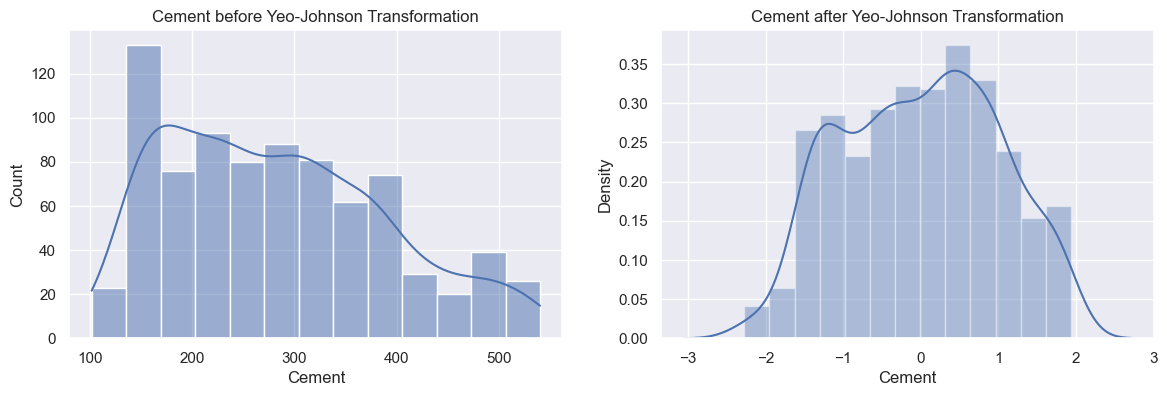

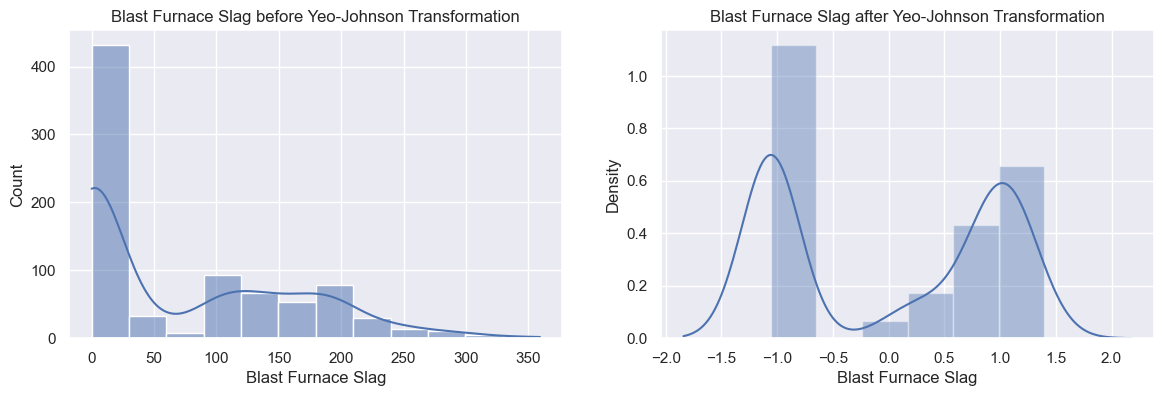

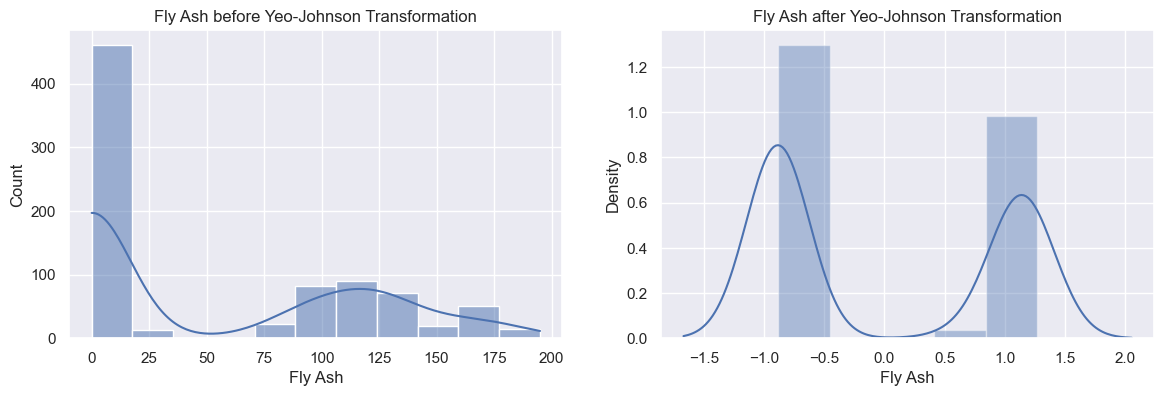

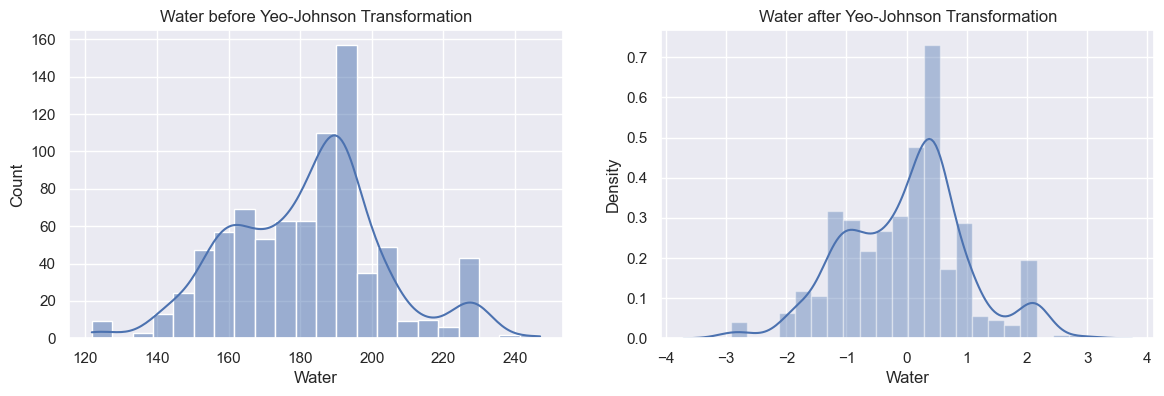

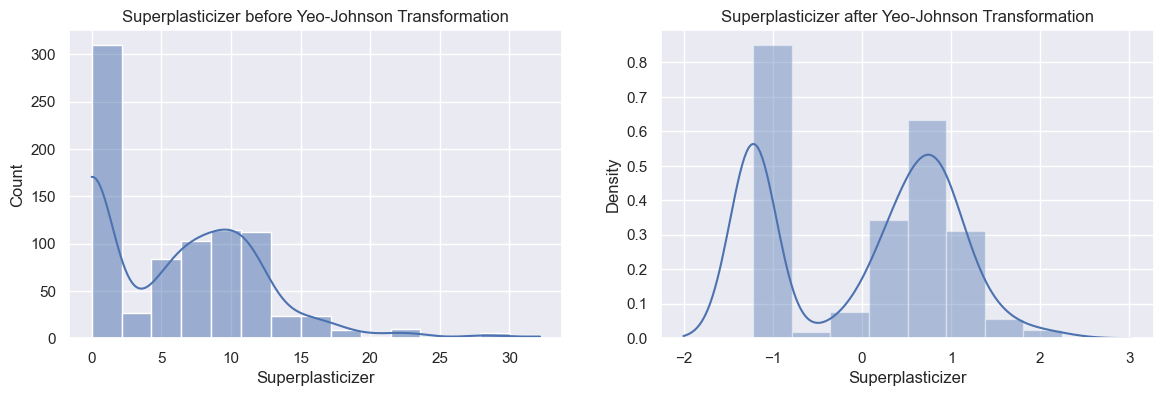

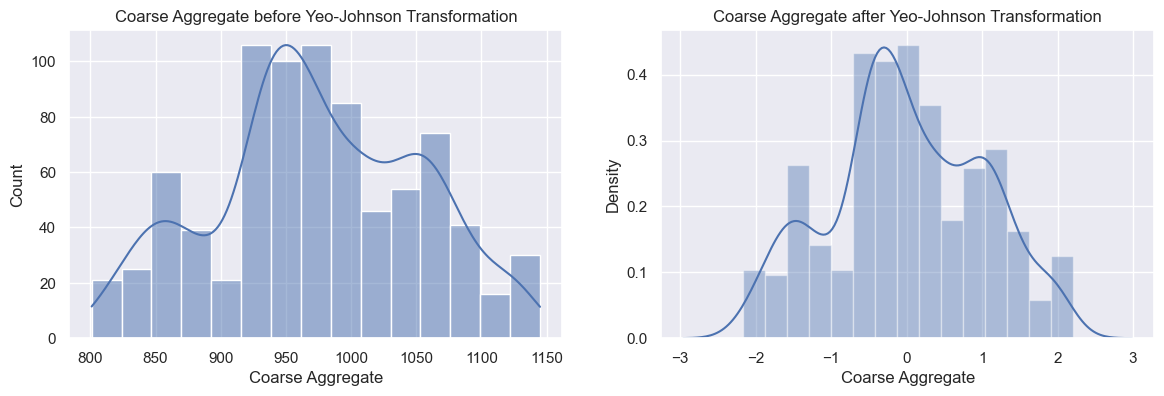

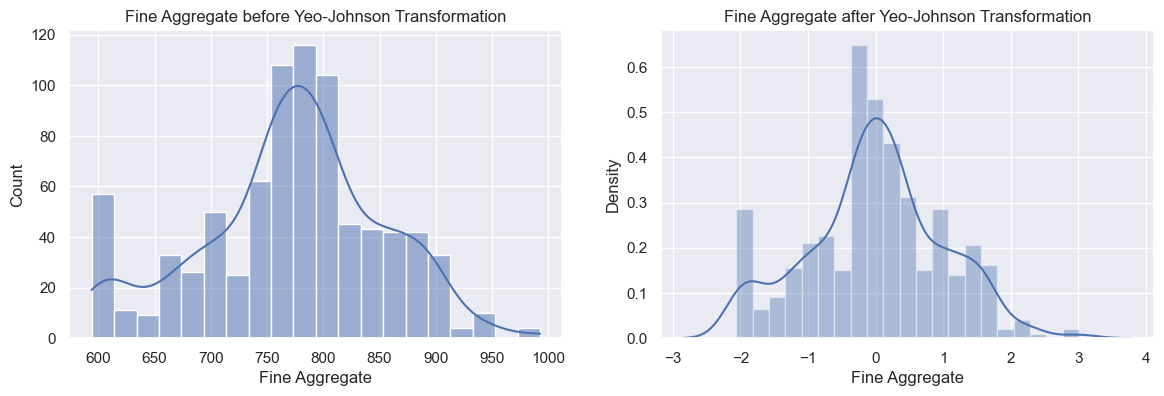

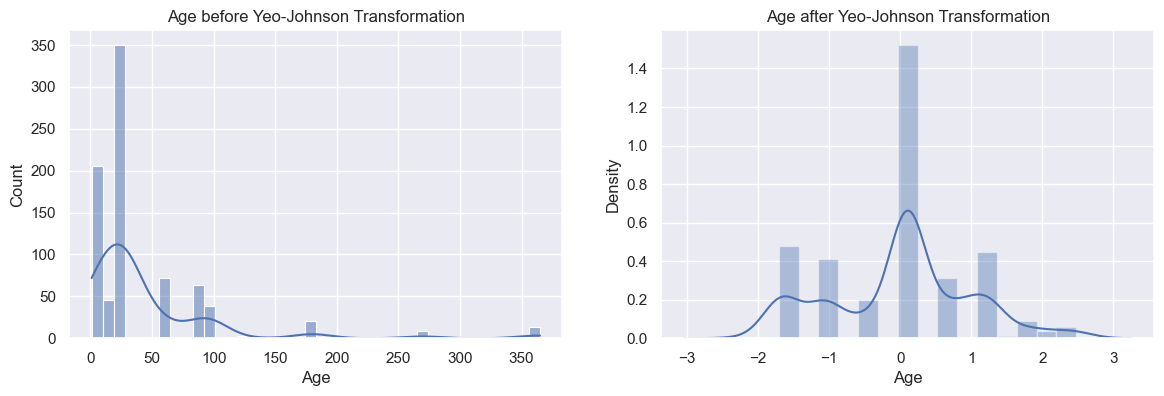

In [49]:
# Comparison of Before and after for Yeo-Johnson Plot

# Here transforming the 'X_train_transformed' as dataframe so we can plot graph
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)


for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(f"{col} before Yeo-Johnson Transformation")

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(f"{col} after Yeo-Johnson Transformation")

    plt.show()

In [50]:
# Comparison of lambda values of both the transformations

pd.DataFrame({'cols':X_train.columns, 'box_cox_lambdas':pt.lambdas_, 
              'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885


#### Summarize:

- If working with an algorithm that works better with *`Gaussian Distribution`*.
- Check whether the columns are normally distributed or not.
- Then apply *`PowerTransformer()`* as it performs better than the *`FunctionTransformer()`* as most of the times the previous one works better than the later one. But both can be tried and find the best for the model.

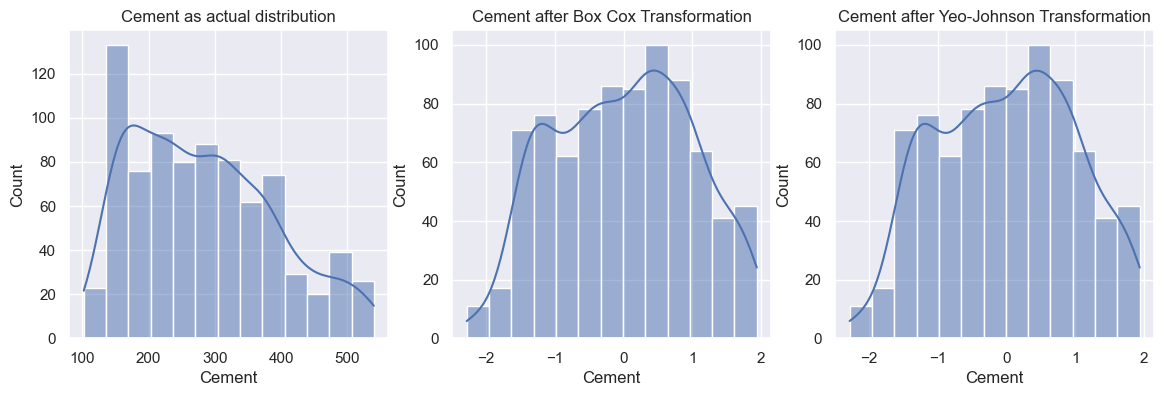

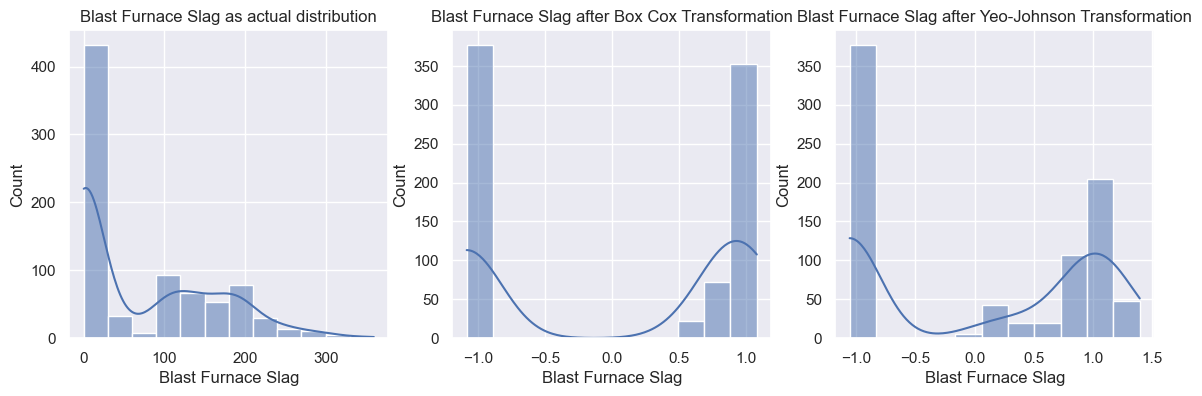

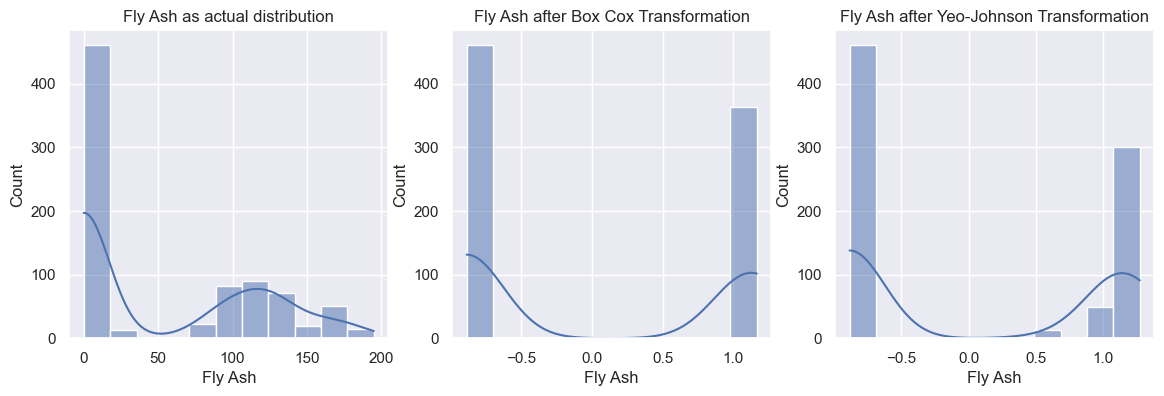

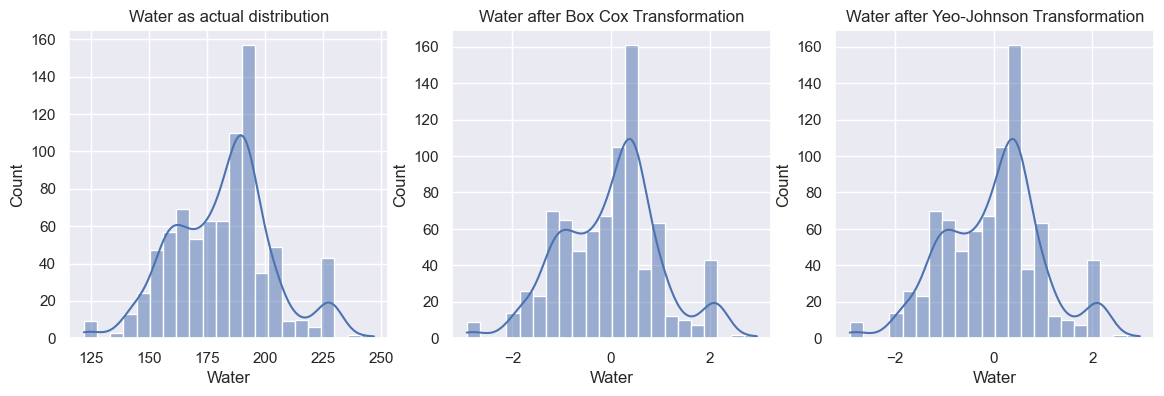

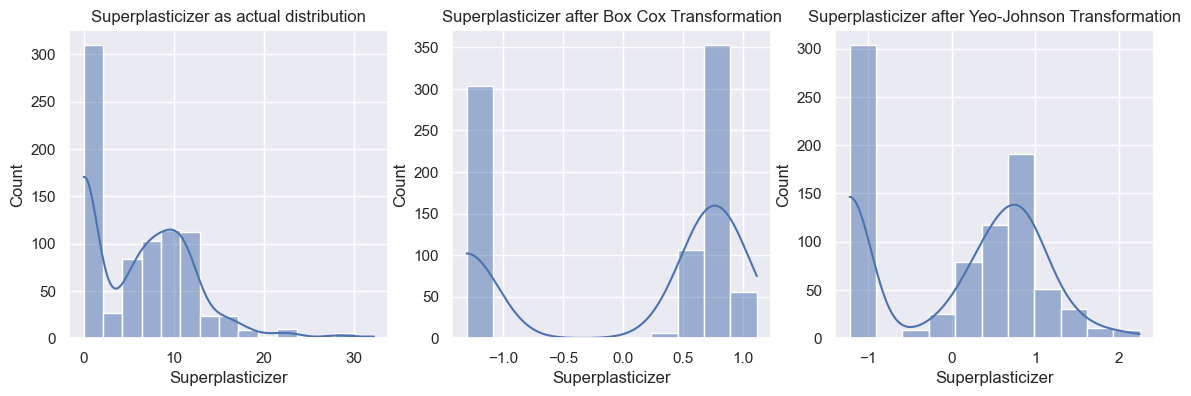

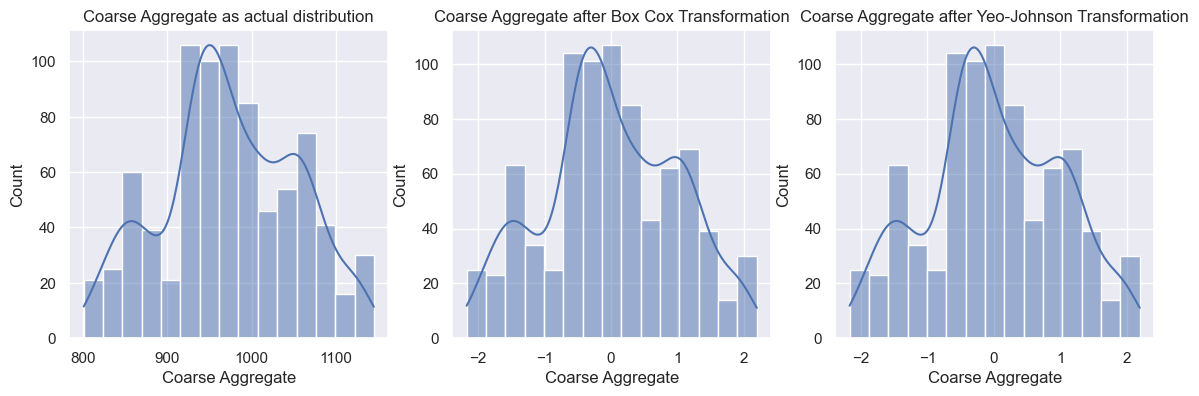

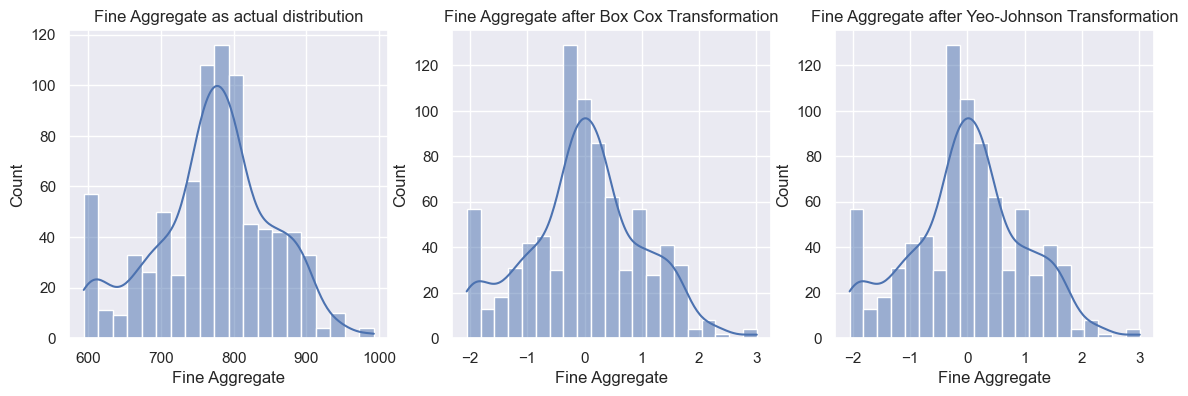

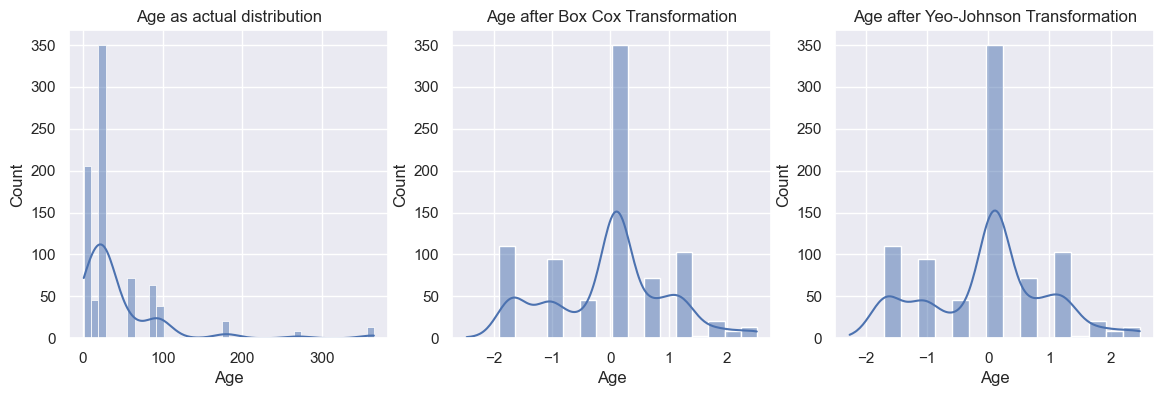

In [52]:
# Checking each column in both transformation along with the original data side by side

# for Box Cox
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# for Yeo-Johnson
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)


for col in X_train_transformed.columns:
    plt.figure(figsize=(14, 4))

    plt.subplot(131)
    sns.histplot(x=X_train[col], kde=True)
    plt.title(f"{col} as actual distribution")

    plt.subplot(132)
    sns.histplot(x=X_train_transformed[col], kde=True)
    plt.title(f"{col} after Box Cox Transformation")

    plt.subplot(133)
    sns.histplot(x=X_train_transformed2[col], kde=True)
    plt.title(f"{col} after Yeo-Johnson Transformation")

    plt.show()
   